In [ ]:
!pip install pytreebank


  Created wheel for pytreebank: filename=pytreebank-0.2.7-cp37-none-any.whl size=37070 sha256=b6f9e78891cee26ab96a932a7af7e2d4cab603fea741bbdb5a56c4fa47774c85
  Stored in directory: /root/.cache/pip/wheels/e0/b6/91/e9edcdbf464f623628d5c3aa9de28888c726e270b9a29f2368
Successfully built pytreebank


In [ ]:
!pip install google-trans-new

In [ ]:
import pytreebank
# load the sentiment treebank corpus in the parenthesis format,
# e.g. "(4 (2 very ) (3 good))"
dataset = pytreebank.load_sst()
# add Javascript and CSS to the Ipython notebook
#pytreebank.LabeledTree.inject_visualization_javascript()
# select and example to visualize
#example = dataset["train"][0]
# display it in the page
#example.text


In [ ]:
len(dataset['train']), len(dataset['test']), len(dataset['dev'])

(8544, 2210, 1101)

In [ ]:
#example = dataset['dev']

In [ ]:
full_data = []
for example in dataset["train"]:
  i= 0
  for label, sentence in example.to_labeled_lines():
    full_data.append((sentence, label))
    break
for example in dataset["dev"]:
  i= 0
  for label, sentence in example.to_labeled_lines():
    full_data.append((sentence, label))
    break

for example in dataset["test"]:
  i= 0
  for label, sentence in example.to_labeled_lines():
    full_data.append((sentence, label))
    break


In [ ]:
len(full_data)

11855

In [ ]:
def get_separate_labels(text,label):
  return[x for x in text if x[1]==label]
def get_split(list,perc):
  return int(perc*len(list))

In [ ]:
very_negative_list = get_separate_labels(full_data,0)
negative_list = get_separate_labels(full_data,1)
neutral_list = get_separate_labels(full_data,2)
positive_list = get_separate_labels(full_data,3)
very_positive = get_separate_labels(full_data,4)

In [ ]:
import random
aug_list = [ x
            for label_list in [random.sample(very_negative_list,get_split(very_negative_list,1)),
                   random.sample(negative_list, get_split(negative_list,0.1)),
                   random.sample(neutral_list,get_split(neutral_list,0.1)),
                   random.sample(positive_list, get_split(positive_list,0.4)),
                   random.sample(very_positive, get_split(very_positive,0.8))]
                   for x in label_list ]


In [ ]:
aug_list[0]

("Nothing about the film -- with the possible exception of Elizabeth Hurley 's breasts -- is authentic .",
 0)

In [ ]:

very_negative_list[80]

("Stealing Harvard does n't care about cleverness , wit or any other kind of intelligent humor .",
 0)

In [ ]:
for label, sentence in example.to_labeled_lines():
	print("%s has sentiment label %s" % (
		sentence,
		["very negative", "negative", "neutral", "positive", "very positive"][label]
	))

( U ) nrelentingly stupid . has sentiment label very negative
( U ) has sentiment label neutral
( has sentiment label negative
U ) has sentiment label neutral
U has sentiment label neutral
) has sentiment label positive
nrelentingly stupid . has sentiment label very negative
nrelentingly stupid has sentiment label very negative
nrelentingly has sentiment label neutral
stupid has sentiment label very negative
. has sentiment label neutral


In [ ]:
import random
import torch, torchtext
from torchtext.legacy import data


In [ ]:
import collections

x,y = list(zip(*full_data))
count  = collections.Counter(y)
count

Counter({0: 1510, 1: 3140, 2: 2242, 3: 3111, 4: 1852})

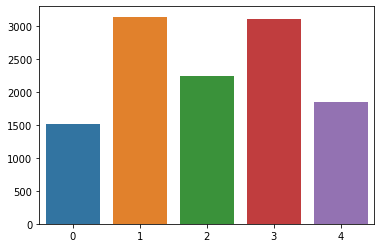

In [ ]:

import seaborn as sns

#x=tweet.target.value_counts()
x = list(count.keys())
y = list(count.values())
sns.barplot(x=x,y=y)
#plt.gca().set_ylabel('samples')

In [ ]:
print(x,y)

[3, 4, 2, 1, 0] [3111, 1852, 2242, 3140, 1510]


In [ ]:
full_data[1][-1]

4

SyntaxError: ignored

In [ ]:
def random_insertion(sentence, n): 
    words = remove_stopwords(sentence) 
    for _ in range(n):
        new_synonym = get_synonyms(random.choice(words))
        sentence.insert(randrange(len(sentence)+1), new_synonym) 
    return sentence

In [ ]:
#x = random_insertion(full_data[1], 1)

In [ ]:
""" more_data = []
for text, label in full_data:
  if label!=2 and text:
    more_data.append((label, back_translator(text)))
    break """

In [ ]:
def random_deletion(words, p=0.5): 
    if len(words) == 1: # return if single word
        return words
    remaining = list(filter(lambda x: random.uniform(0,1) > p,words)) 
    if len(remaining) == 0: # if not left, sample a random word
        return [random.choice(words)] 
    else:
        return remaining

In [ ]:
def random_swap(sentence, n=5): 
    length = range(len(sentence)) 
    for _ in range(n):
        idx1, idx2 = random.sample(length, 2)
        sentence[idx1], sentence[idx2] = sentence[idx2], sentence[idx1] 
    return sentence

In [ ]:
!pip install googletrans==3.1.0a0

     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 1.0MB 32.4MB/s 
     |████████████████████████████████| 71kB 9.1MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-cp37-none-any.whl size=16368 sha256=500018dd0b092d95f6b88cd8afb918a30c718f31c42ab7915cd4f1cf11df9bb8
  Stored in directory: /root/.cache/pip/wheels/27/7a/a0/aff3babbb775549ce6813cb8fa7ff3c0848c4dc62c20f8fdac
Successfully built googletrans


In [ ]:
import random
import googletrans
from googletrans import Translator
#import google_trans_new 
#from google_trans_new import google_translator  

def back_translator(sentence):
  translator = Translator()
  #translator = google_translator()
  #sentence = ['']

  available_langs = list(googletrans.LANGUAGES.keys()) 
  trans_lang = random.choice(available_langs) 
  #print(f"Translating to {googletrans.LANGUAGES[trans_lang]}")

  translations = translator.translate(sentence, dest=trans_lang).text
  #print(sentence, type(sentence))
  #t_text = [t.text for t in translations]
  #print(translations)

  translations_en_random = translator.translate(translations, src=trans_lang, dest='en').text
  #en_text = [t.text for t in translations_en_random]
  print(translations_en_random)
  #return en_text
  return translations_en_random

In [ ]:
test = back_translator(very_positive[1])

Translating to thai
ไม่ว่าคุณจะรู้แจ้งจากการบรรยายเรื่อง `` คนอื่น '' และ `` ตัวเอง' ของ Derrida หรือไม่ก็ตาม '' Derrida เป็นเพื่อนที่มีเสน่ห์และขี้เล่นอย่างปฏิเสธไม่ได้
Whether you're enlightened by Derrida's narrative of `` others'' and `` yourself,'' Derrida is an undeniably charming and playful friend.


In [ ]:
print(very_positive)
test = random_swap(list(very_positive[1]))
print(test)

[("The gorgeously elaborate continuation of `` The Lord of the Rings '' trilogy is so huge that a column of words can not adequately describe co-writer/director Peter Jackson 's expanded vision of J.R.R. Tolkien 's Middle-earth .", 4), ("Whether or not you 're enlightened by any of Derrida 's lectures on `` the other '' and `` the self , '' Derrida is an undeniably fascinating and playful fellow .", 4), ('Just the labour involved in creating the layered richness of the imagery in this chiaroscuro of madness and light is astonishing .', 4), ("a screenplay more ingeniously constructed than `` Memento ''", 4), ('Good fun , good action , good acting , good dialogue , good pace , good cinematography .', 4), ('Dramas like this make it human .', 4), ('Still , this flick is fun , and host to some truly excellent sequences .', 4), ('Absorbing character study by André Turpin .', 4), ("You 'll probably love it .", 4), ("Grenier is terrific , bringing an unforced , rapid-fire delivery to Toback 's

In [ ]:
import numpy as np


In [ ]:
def data_augment(sentence,n=4):
  n=random.randint(1,3)
  if n==1:
    sentence = ''.join(random_deletion(list(sentence)))
  elif n==2:
    sentence = ''.join(random_swap(list(sentence)))
  else:
    sentence = ''.join(back_translator(sentence))
  return sentence

In [ ]:
iterator = 0
for i in aug_list:
  if iterator%100==0:
    print("sentences changes {}".format(iterator))
  iterator+=1
  x,y=i
  x=data_augment(x)
  full_data.append((x,y))

sentences changes 0
The film is like a chain between the beginning and the middle that never starts.
Goldmember isn’t familiar with the previous pictures, and it looks like Jay Roach starred in the film from behind the scenes.
Not a bad premise, just a bad movie.
Stealing at Harvard doesn’t care about intellect, wit or any other kind of clever humor.
Lack of suicide in its implementation and lack of real purification in its usefulness.
One of the inconsistent features in the latter memory.
Aside from some of the things that were quickly entertaining Cedric the Entertainer as Perry’s coach, there is time to buy here.
The wedding feels a bit anachronistic.
Guided by the intellect rather than the heart, his story flattens rather than sharpened it.
Not to be mentioned, except to report the number of tumbleweeds planted in the empty theater provided by the company.
Dull, somnambulant pretentious exercise, the spreading silence of which is broken by frequent outbreaks of violence and noise.


In [ ]:
import random
import torch, torchtext.legacy
from torchtext.legacy import data

In [ ]:
Review = data.Field(sequential = True, tokenize = 'spacy', batch_first =True, include_lengths=True, pad_first = True)
Label = data.LabelField(tokenize ='spacy', is_target=True, batch_first =True, sequential =False)

In [ ]:
fields = [('reviews', Review),('labels',Label)]
fields

[('reviews', <torchtext.legacy.data.field.Field at 0x7f992d5db410>),
 ('labels', <torchtext.legacy.data.field.LabelField at 0x7f98e8d6c090>)]

In [ ]:
#class_to_idx = 

In [ ]:
example = [data.Example.fromlist([full_data[i][0], full_data[i][1]], fields) for i in range(len(full_data))]
#example_train = 

In [ ]:
example[0]

In [ ]:
SEED = 43
torch.manual_seed(SEED) 

In [ ]:
reviewDataset = data.Dataset(example, fields,)

In [ ]:
(train, valid) = reviewDataset.split(split_ratio=[0.8, 0.2], random_state=random.seed(SEED))

In [ ]:
vars(train.examples[60])

{'labels': 1,
 'reviews': ['These',
  'spidersacae',
  'outrun',
  '  ',
  'motorcycle',
  'and',
  'wrap',
  'a',
  'porson',
  'in',
  'a',
  'sticky',
  'cocoon',
  'in',
  'seceids',
  ',',
  'but',
  'they',
  'fall',
  'short',
  'of',
  'being',
  'nntnresting',
  'or',
  'entertaining',
  '.']}

In [ ]:
Review.build_vocab(train)
Label.build_vocab(train)

In [ ]:
Review.build_vocab(train)

In [ ]:
vars(Label)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
train_iterator, valid_iterator = data.BucketIterator.splits((train, valid), batch_size = 28, 
                                                            sort_key = lambda x: len(x.reviews),
                                                            sort_within_batch=True, device =device)

In [ ]:
import os, pickle
with open('tokenizer.pkl', 'wb') as tokens: 
    pickle.dump(Review.vocab.stoi, tokens)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class classifier(nn.Module):
    
    # Define all the layers used in model
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, dropout):
        
        super().__init__()          
        
        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        #RNN layer
        
        self.encoder = nn.RNN(embedding_dim,
                              hidden_dim,
                              num_layers=n_layers, 
                              batch_first=True)

        # LSTM layer
        """
        self.encoder = nn.LSTM(embedding_dim, 
                           hidden_dim, 
                           num_layers=n_layers, 
                           dropout=dropout,
                           batch_first=True)
        
        self.encoder = nn.GRU(embedding_dim, 
                              hidden_dim,
                              num_layers=n_layers,
                              dropout=dropout,
                              batch_first=True) 
        """
        # try using nn.GRU or nn.RNN here and compare their performances
        # try bidirectional and compare their performances
        self.drop = nn.Dropout(p=dropout)
        # Dense layer
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.sig = nn.Sigmoid()
        
    def forward(self, text, text_lengths):
        
        # text = [batch size, sent_length]
        embedded = self.drop(self.embedding(text))
        # embedded = [batch size, sent_len, emb dim]
      
        # packed sequence
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths.cpu(), batch_first=True)
        
        packed_output, hidden = self.encoder(packed_embedded)
        #hidden = [batch size, num layers * num directions,hid dim]
        #cell = [batch size, num layers * num directions,hid dim]

        # Hidden = [batch size, hid dim * num directions]
        dense_outputs = self.fc(hidden)   
        #print(dense_outputs[0])
        # Final activation function softmax
        output = F.softmax(dense_outputs[0], dim=1)
 
        #sig_out = self.sig(dense_outputs)
        
        # reshape to be batch_size first
        #Sig_out = sig_out.view(text[0], -1)

        #sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        #return sig_out, hidden
            
        return output

In [ ]:
size_of_vocab = len(Review.vocab)
embedding_dim = 256
num_hidden_nodes = 50
num_output_nodes = 5
num_layers = 2
dropout = 0.2

# Instantiate the model
model = classifier(size_of_vocab, embedding_dim, num_hidden_nodes, num_output_nodes, num_layers, dropout = dropout)

In [ ]:
print(model)

#No. of trianable parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
    
print(f'The model has {count_parameters(model):,} trainable parameters')

classifier(
  (embedding): Embedding(31533, 256)
  (encoder): RNN(256, 50, num_layers=2, batch_first=True)
  (drop): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=50, out_features=5, bias=True)
  (sig): Sigmoid()
)
The model has 8,093,203 trainable parameters


In [ ]:
import torch.optim as optim

# define optimizer and loss
optimizer = optim.Adam(model.parameters(), lr=1e-4) #2e-4
criterion = nn.CrossEntropyLoss()

# define metric
def binary_accuracy(preds, y):
    #round predictions to the closest integer
    _, predictions = torch.max(preds, 1)
    #print("pred   ", preds)
    #print("label   ", y)
    correct = (predictions == y).float() 
    acc = correct.sum() / len(correct)
    return acc
    
# push to cuda if available
model = model.to(device)
criterion = criterion.to(device)

In [ ]:
def train(model, iterator, optimizer, criterion):
    
    # initialize every epoch 
    epoch_loss = 0
    epoch_acc = 0
    
    # set the model in training phase
    model.train()  
    i=0
    for batch in iterator:
        i+=1
        # resets the gradients after every batch
        optimizer.zero_grad()   
        
        # retrieve text and no. of words
        review, review_lengths = batch.reviews   
        
        # convert to 1D tensor
        predictions = model(review, review_lengths).squeeze()  
        
        # compute the loss
        loss = criterion(predictions, batch.labels)        
        
        # compute the binary accuracy
        acc = binary_accuracy(predictions, batch.labels)   
        
        # backpropage the loss and compute the gradients
        loss.backward()       
        
        # update the weights
        optimizer.step()   

        
        # loss and accuracy
        epoch_loss += loss.item()  
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def evaluate(model, iterator, criterion):
    
    # initialize every epoch
    epoch_loss = 0
    epoch_acc = 0

    # deactivating dropout layers
    model.eval()
    
    # deactivates autograd
    with torch.no_grad():
    
        for batch in iterator:
        
            # retrieve text and no. of words
            #print("\nbatch.reviews  {}".format(batch.reviews))
            review, review_lengths = batch.reviews
            #print("review {}\nreview lengths{}".format(review,review_lengths))

            # convert to 1d tensor
            #print("model.sqeeze: {}".format(model(review, review_lengths).squeeze()))
            predictions = model(review, review_lengths).squeeze()
            #print("prediction {}".format(predictions))

            # compute loss and accuracy
            loss = criterion(predictions, batch.labels)
            acc = binary_accuracy(predictions, batch.labels)
            #print("loss: {}\nloss.item: {}\n acc: {}\n acc.item{}".format(loss,loss.item,acc,acc.item))
            # keep track of loss and accuracy

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
N_EPOCHS = 200
best_valid_loss = float('inf')
i=0
valid_acc_list = []
train_acc_list = []
for epoch in range(N_EPOCHS):
    i+=1
    # train the model
    #print("Model : {0} \ntrain iterator {1}\noptmiser {2}\nCriterion {3}".format(model,train_iterator,optimizer, criterion))
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    train_acc_list.append(train_acc)
  
    # evaluate the model
    #print("\nvalid") 
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    valid_acc_list.append(valid_acc)
    # save the best model
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}% \n')
print(max(valid_acc_list))

	Train Loss: 1.601 | Train Acc: 24.27%
	 Val. Loss: 1.594 |  Val. Acc: 25.92% 

	Train Loss: 1.597 | Train Acc: 25.59%
	 Val. Loss: 1.593 |  Val. Acc: 26.31% 

	Train Loss: 1.595 | Train Acc: 25.60%
	 Val. Loss: 1.592 |  Val. Acc: 26.37% 

	Train Loss: 1.593 | Train Acc: 26.35%
	 Val. Loss: 1.591 |  Val. Acc: 26.77% 

	Train Loss: 1.593 | Train Acc: 26.13%
	 Val. Loss: 1.590 |  Val. Acc: 26.71% 

	Train Loss: 1.592 | Train Acc: 25.98%
	 Val. Loss: 1.589 |  Val. Acc: 26.74% 

	Train Loss: 1.589 | Train Acc: 26.92%
	 Val. Loss: 1.588 |  Val. Acc: 26.71% 

	Train Loss: 1.588 | Train Acc: 27.15%
	 Val. Loss: 1.588 |  Val. Acc: 27.16% 

	Train Loss: 1.585 | Train Acc: 27.75%
	 Val. Loss: 1.587 |  Val. Acc: 27.09% 

	Train Loss: 1.582 | Train Acc: 28.10%
	 Val. Loss: 1.587 |  Val. Acc: 26.85% 

	Train Loss: 1.579 | Train Acc: 29.12%
	 Val. Loss: 1.585 |  Val. Acc: 27.48% 

	Train Loss: 1.575 | Train Acc: 29.62%
	 Val. Loss: 1.584 |  Val. Acc: 27.15% 

	Train Loss: 1.571 | Train Acc: 30.88%
	

In [ ]:
import pandas as pd

#sentences = pd.read_csv("/content/datasetSentences.txt", sep='\t')
#phrase = pd.read_csv("/content/dictionary.txt", sep='|')

In [ ]:
sentences.head()
sentences['sentence'].dtype

In [ ]:
phrase.columns = ['sentence', 'id']
phrase.head()
phrase['sentence'].ast

In [ ]:
sentences.info()

In [ ]:
phrase.info()

In [ ]:
join_df = sentences.join(phrase,on='sentence' ,how='left', lsuffix='left_')


In [ ]:
join_df.shape

In [ ]:
df_merge = pd.merge(sentences, phrase, how='inner', on='sentence')

In [ ]:
df_merge.shape